# Project Title: House Price Prediction

# Project  Content

- Problem Statement
- Import of data
- Data Exploration
- Feature Engineering
- Feature Selection
- Build Model
- Evaluation of the Model

# Problem Statement

We are presented with a dataset (train dataset) which consists of informations about Houses, and these informations determined the value of the Houses in price. We are to build a machine learning model that is cable of predicting the future price of the Houses which contains such informations as present in the train dataset.

# Import of data
Here, we import all the basic libraries and load the train and the test dataset using pandas

In [1]:
# import the necesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# setting the display
sns.set_style("darkgrid")
pd.set_option("display.max_rows",30)
pd.set_option("display.max_columns",200)

In [2]:
# import the dataset
train_df =pd.read_csv("train.csv")
test_df =pd.read_csv("test.csv")

In [3]:
# print the first 5 row of the train_df
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Data Exploration

Data Exploration is the process of analysis the data through visualazation and satistical method  in order to understand the pattern of the data and to draw more insight from the data

In [4]:
# show the info of the train_df
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

- The dataset consist of 81( that is 80 independent features and 1 dependent feature) columns and 1460 rows
- 43 columns present in the dataset consist of category dytpe
- 3 columns consist of  float dtype
- 35 columns consist of int


In [5]:
# show the columns of the dataset
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Univariate Analysis
- This involve the analysis of each column present in the dataset one by one to understand its effect on the dataset and the pattern they follow

In [6]:
# define a function of barplot for the object dtypes univariate analysis
def barplot(feature):
    sns.catplot(data=train_df, kind="bar", x= train_df[feature].value_counts().index, y=train_df[feature].value_counts())
    plt.title(feature)
    plt.show()

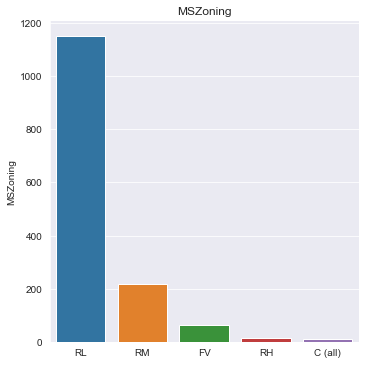

In [7]:
# show the barplot of MSZoning column
barplot("MSZoning")

Here 78.8% of data in MSZoning made up of RL, 14.9% of RM, 4.5% of FV, 1.1% of RH and 0.7% belong to C

In [8]:
train_df["LotShape"].value_counts()/train_df["LotShape"].count() * 100

Reg    63.356164
IR1    33.150685
IR2     2.808219
IR3     0.684932
Name: LotShape, dtype: float64

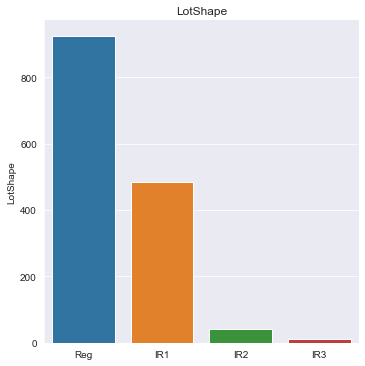

In [9]:
barplot("LotShape")

# The plot above show the LotShape from the dataset

63.4% is Reg, 33.2% is IR1, 2.8% is IR2 and 0.7% of IR#

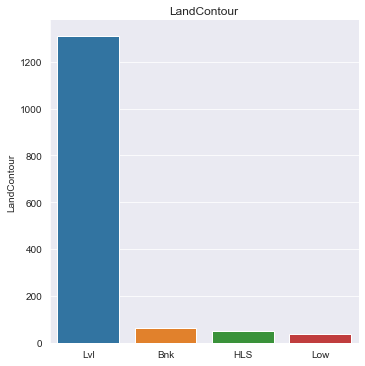

In [10]:
barplot("LandContour")

# The plot above show 

- we have 1311 total number of Landcontour which are lvl
- we have 63 total number of Landcontour which are Bnk
- we have 50 total number of Landcontour which are HLS
- we have 36 total number of Landcontour which are Low

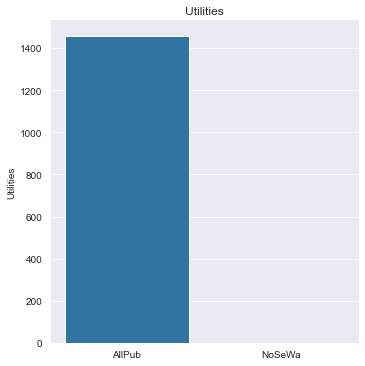

In [11]:
barplot("Utilities")

# from Utilities plot:
- We have allPub with total number of 1459
- we have Nosewa with total number of 1

# Bivariance

In [13]:
# define a scatter plot for contineous variable
def scatterplot(feature):
    sns.scatterplot(data=train_df, x=feature, y="SalePrice", hue="Neighborhood")

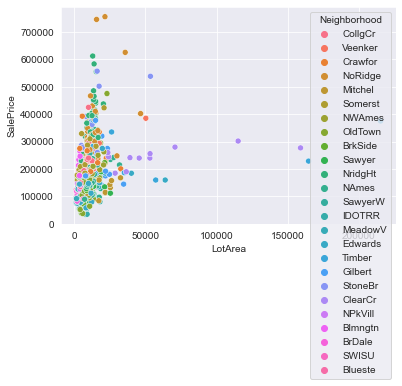

In [14]:
# show a scatter plot of LotArea and Neighborhood  against Price
plt.figsize=(200,200)
scatterplot("LotArea")

It can be say from the plot above that Neighborhood play high significantly  in determining the price of the house, as LotArea with small size have high price and some LotArea with Big size has lower Price as a result of the neighborhood.

In [307]:
u=train_df.groupby("SalePrice").mean()["YearBuilt"] 

In [25]:
(pd.pivot_table(train_df, columns="YearBuilt", values="SalePrice", aggfunc="mean")).sort_index()

YearBuilt,1872,1875,1880,1882,1885,1890,1892,1893,1898,1900,1904,1905,1906,1908,1910,1911,1912,1913,1914,1915,1916,1917,1918,1919,1920,1921,1922,1923,1924,1925,1926,1927,1928,1929,1930,1931,1932,1934,1935,1936,1937,1938,1939,1940,1941,1942,1945,1946,1947,1948,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
SalePrice,122000.0,94000.0,200619.75,168000.0,111250.0,142200.0,291250.0,325000.0,106000.0,112492.6,157500.0,163000.0,135000.0,183500.0,111959.058824,130000.0,119466.666667,90350.0,126055.285714,134387.5,139800.0,129500.0,172421.428571,154833.333333,112903.333333,140813.333333,109237.5,159428.571429,105985.714286,129190.625,124144.444444,82666.666667,135557.142857,153000.0,103588.888889,126650.0,233358.5,220766.666667,161083.333333,137888.888889,131974.2,109137.5,150825.0,131994.444444,120900.0,162000.0,133500.0,122400.0,117200.0,137764.285714,111517.583333,128036.25,136600.0,110398.6,146333.333333,139650.0,134517.1875,135810.714286,149959.1,143179.166667,154124.307692,161550.0,139846.428571,145742.105263,143403.125,161893.333333,153115.958333,159559.444444,142337.5,166075.0,160725.642857,134647.916667,131820.454545,140569.565217,139400.0,183050.0,159268.75,163831.969697,166860.9375,160962.5,156396.888889,164800.0,249880.0,132400.0,181400.0,164111.111111,191400.0,212000.0,198000.0,204636.363636,279500.0,220881.666667,186140.0,218384.615385,218058.823529,247900.0,262194.444444,259162.666667,214925.0,220450.0,210614.72,210766.666667,242630.0,226869.565217,227408.577778,210347.722222,229680.953125,251775.447761,255362.734694,348849.130435,269220.0,394432.0


The pivot Table above show the average price of houses based on the yearbuilt. It can be seen from the table that the house built in 2010 has the highest average price. This make sense as more advance material will be used in building the house

In [30]:
pd.crosstab(index=train_df["MSZoning"], columns=train_df["LotShape"])

LotShape,IR1,IR2,IR3,Reg
MSZoning,,,,
C (all),1,0,0,9
FV,10,3,0,52
RH,2,1,0,13
RL,455,35,9,652
RM,16,2,1,199


The frequency table above show the relationship between Lotshape and MSZoning 

# Feature Engineering 

Is the process of using domain knowledge to transform features. Here we will be dealing and traeting the missing values, transform all the category variable into numerical variable and dropping any column which may not influence performance of the model 

In [191]:
# read the train and the test dataset
train_df =pd.read_csv("train.csv")
test_df =pd.read_csv("test.csv")

In [192]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.00,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.00,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.00,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.00,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.00,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.00,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.00,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<AxesSubplot:>

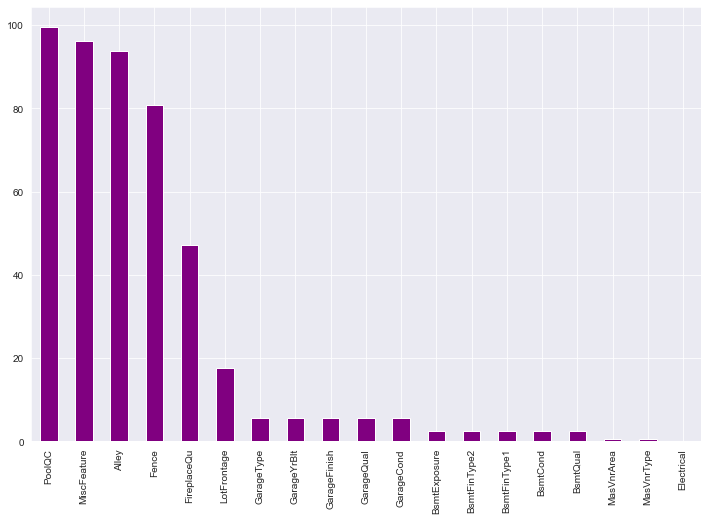

In [193]:
# check the missing_value
missing_values= train_df.isna().sum()
per= train_df.isna().sum() / train_df.isna().count() * 100
total = pd.concat([missing_values, per], axis=1, keys=("Number_of_missingvalues", "Percent_of_missing_value"))
total= total[total["Number_of_missingvalues"]>0]
total=total.sort_values(by="Percent_of_missing_value",ascending=False )
plt.figure(figsize=(12,8))
total["Percent_of_missing_value"].plot(kind="bar",color="purple")

# Check for the Duplicate

In [194]:
# check for the duplicate
train_df.duplicated().sum()

0

In [195]:
# check the statistic infomation of the train dataset
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.00,1460.00,1201.00,1460.00,1460.00,1460.00,1460.00,1460.00,1452.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1379.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00
mean,730.50,56.90,70.05,10516.83,6.10,5.58,1971.27,1984.87,103.69,443.64,46.55,567.24,1057.43,1162.63,346.99,5.84,1515.46,0.43,0.06,1.57,0.38,2.87,1.05,6.52,0.61,1978.51,1.77,472.98,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,2007.82,180921.20
std,421.61,42.30,24.28,9981.26,1.38,1.11,30.20,20.65,181.07,456.10,161.32,441.87,438.71,386.59,436.53,48.62,525.48,0.52,0.24,0.55,0.50,0.82,0.22,1.63,0.64,24.69,0.75,213.80,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,79442.50
min,1.00,20.00,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,0.00,0.00,0.00,334.00,0.00,0.00,334.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,1900.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,34900.00
25%,365.75,20.00,59.00,7553.50,5.00,5.00,1954.00,1967.00,0.00,0.00,0.00,223.00,795.75,882.00,0.00,0.00,1129.50,0.00,0.00,1.00,0.00,2.00,1.00,5.00,0.00,1961.00,1.00,334.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,2007.00,129975.00
50%,730.50,50.00,69.00,9478.50,6.00,5.00,1973.00,1994.00,0.00,383.50,0.00,477.50,991.50,1087.00,0.00,0.00,1464.00,0.00,0.00,2.00,0.00,3.00,1.00,6.00,1.00,1980.00,2.00,480.00,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,163000.00
75%,1095.25,70.00,80.00,11601.50,7.00,6.00,2000.00,2004.00,166.00,712.25,0.00,808.00,1298.25,1391.25,728.00,0.00,1776.75,1.00,0.00,2.00,1.00,3.00,1.00,7.00,1.00,2002.00,2.00,576.00,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,214000.00
max,1460.00,190.00,313.00,215245.00,10.00,9.00,2010.00,2010.00,1600.00,5644.00,1474.00,2336.00,6110.00,4692.00,2065.00,572.00,5642.00,3.00,2.00,3.00,2.00,8.00,3.00,14.00,3.00,2010.00,4.00,1418.00,857.00,547.00,552.00,508.00,480.00,738.00,15500.00,12.00,2010.00,755000.00


# MSZoning Column
Here, sinec the column does not have missing valeu, we will transform the the column from category to numeric, And since the category present do not follow order of ranking, we will be using OneHotEncoder to fromsform the variable 

In [196]:
test_df["MSZoning"].isna().sum(), train_df["MSZoning"].isna().sum() 
test_df["MSZoning"].fillna("RL", inplace=True)
# encode the MSZoning using OneHotEncoder
train_df = pd.get_dummies(data= train_df, columns=["MSZoning"], drop_first=True)
test_df = pd.get_dummies(data= test_df, columns=["MSZoning"], drop_first=True)

# LotFrontage Column

Here, we will treat the missing values by finding the mean of the column then replace the the mean_value with the missing values

In [197]:
test_df["LotFrontage"].isna().sum(), train_df["LotFrontage"].isna().sum() 

# find the mean of the train_df then replace it to nan values
train_mean = train_df.LotFrontage.mean()
train_df.LotFrontage.fillna(train_mean, inplace=True)

# find the mean of the test_df then replace it to nan values
test_mean = test_df.LotFrontage.mean()
test_df.LotFrontage.fillna(test_mean, inplace=True)

# Street Columns
this column consist of about 99.1% of uniqeu values, i will drop the column as it may not have significant effect of the model

In [198]:
# droop the column
train_df.drop(columns=["Street"], inplace=True)
test_df.drop(columns=["Street"], inplace=True)

# Alley Column
I will drop the column too, because of high number of uniqueness

In [199]:
# droop the column

train_df.drop(columns=["Alley"], inplace=True)
test_df.drop(columns=["Alley"], inplace=True)

# LotShape Column
The category here follow order of ranking, we will be sing labelEncoder to transform the category

In [200]:
# map the category in order of ranking
Lotshape_mapping = {"IR3":0, "IR2":1,"IR1" :2, "Reg":3}

train_df["LotShape"]=train_df["LotShape"].map(Lotshape_mapping)
test_df["LotShape"]=test_df["LotShape"].map(Lotshape_mapping)

# LandContour column
The category present do not follow order of ranking, we will be using OneHotEncoder to fromsform the variable 

In [201]:
mapping = {"Lvl":1, "Bnk":2, "HLS": 3, "Low":4}

train_df["LandContour"] = train_df["LandContour"].map(mapping)
test_df["LandContour"] = test_df["LandContour"].map(mapping)

# Utilities Column
 This column consist of about 99.5% of unique value, i will drop the column

In [202]:
train_df.drop(columns="Utilities", inplace=True)
test_df.drop(columns="Utilities", inplace=True)

# LotConfig Column
We will use OneHotEncoder to transform this column

In [203]:
# transform the column
train_df = pd.get_dummies(data=train_df, columns=["LotConfig"], drop_first=True)
test_df = pd.get_dummies(data=test_df, columns=["LotConfig"], drop_first=True)

# LandSlope Column
Here, we will use labelencoder to fram the data

In [204]:
# transform the data
LandSlope_mapping= {"Gtl":0, "Mod":1, "Sev": 2}

train_df["LandSlope"] = train_df["LandSlope"].map(LandSlope_mapping)
test_df["LandSlope"] = test_df["LandSlope"].map(LandSlope_mapping)

# MasVnrArea Column

we will find the mean of the column then replace nan with the value 

In [205]:
# fill the missing value with mean_value
test_mean=train_df.MasVnrArea.mean()
test_df.MasVnrArea.fillna(test_mean, inplace=True)

train_mean=train_df.MasVnrArea.mean()
train_df.MasVnrArea.fillna(train_mean, inplace=True)

# Neighborhood Column
We will use OneHotEncoder to transoform the column

In [206]:
train_df= pd.get_dummies(data=train_df, columns=["Neighborhood"], drop_first=True)
test_df= pd.get_dummies(data=test_df, columns=["Neighborhood"], drop_first=True)

# Condition1 Column
We will use OneHotEncoder to transoform the column

In [207]:
train_df= pd.get_dummies(data=train_df, columns=["Condition1"], drop_first=True)
test_df= pd.get_dummies(data=test_df, columns=["Condition1"], drop_first=True)

# Condition2 Column
We will use OneHotEncoder to transoform the column

In [208]:
train_df["Condition2"].replace(["RRAe","PosA","RRAn"],"Norm", inplace=True)
test_df["Condition2"].isna().sum(), train_df["Condition2"].isna().sum() 

train_df= pd.get_dummies(data=train_df, columns=["Condition2"], drop_first=True)
test_df= pd.get_dummies(data=test_df, columns=["Condition2"], drop_first=True)

# BldgType Column
We will use OneHotEncoder to transoform the column

In [209]:
train_df= pd.get_dummies(data=train_df, columns=["BldgType"], drop_first=True)
test_df= pd.get_dummies(data=test_df, columns=["BldgType"], drop_first=True)

# HouseStyle Columns
We will use OneHotEncoder to transoform the column

In [210]:
train_df["HouseStyle"].replace("2.5Fin", "2.5Unf", inplace=True)

train_df= pd.get_dummies(data=train_df, columns=["HouseStyle"], drop_first=True)
test_df= pd.get_dummies(data=test_df, columns=["HouseStyle"], drop_first=True)

# YearBuilt Column
Here we will bin the columns as two-decade interval and transform using labelencoder

In [211]:
train_df["YearBuilt"]= pd.cut(train_df["YearBuilt"], bins=[1800,1920,1940,1960,1980,2000,2020,2040], 
                              labels=["first_decade", "Second_decade", "Third_decade", "Fourth_decade" ,"Fifth_decade",
                                      "Sixth_decade" ,"Seventh_decade"])



test_df["YearBuilt"]= pd.cut(test_df["YearBuilt"], bins=[1800,1920,1940,1960,1980,2000,2020,2040], 
                              labels=["first_decade", "Second_decade", "Third_decade", "Fourth_decade" ,"Fifth_decade",
                                      "Sixth_decade" ,"Seventh_decade"])


train_df= pd.get_dummies(data=train_df, columns=["YearBuilt"], drop_first=True)
test_df= pd.get_dummies(data=test_df, columns=["YearBuilt"], drop_first=True)

# YearRemodAdd Column
Here we will bin the columns as two-decade interval and transform using labelencoder


In [212]:
train_df["YearRemodAdd"]= pd.cut(train_df["YearRemodAdd"], bins=[1800,1920,1940,1960,1980,2000,2020,2040], 
                              labels=["first_decade", "Second_decade", "Third_decade", "Fourth_decade" ,"Fifth_decade",
                                      "Sixth_decade" ,"Seventh_decade"])

test_df["YearRemodAdd"]= pd.cut(test_df["YearRemodAdd"], bins=[1800,1920,1940,1960,1980,2000,2020,2040], 
                              labels=["first_decade", "Second_decade", "Third_decade", "Fourth_decade" ,"Fifth_decade",
                                      "Sixth_decade" ,"Seventh_decade"])


train_df= pd.get_dummies(data=train_df, columns=["YearRemodAdd"], drop_first=True)
test_df= pd.get_dummies(data=test_df, columns=["YearRemodAdd"], drop_first=True)

# RoofStyle Column
Here, we will use onehotencoder to transform the column

In [213]:
train_df= pd.get_dummies(data=train_df, columns=["RoofStyle"], drop_first=True)
test_df= pd.get_dummies(data=test_df, columns=["RoofStyle"], drop_first=True)

# RoofMatl column
Here, we will use onehotencoder to transform the column

In [214]:
train_df["RoofMatl"].replace(["ClyTile","Roll","Membran","Metal"], ["CompShg","Tar&Grv", "Tar&Grv","Tar&Grv"],
                             inplace=True)

train_df= pd.get_dummies(data=train_df, columns=["RoofMatl"], drop_first=True)
test_df= pd.get_dummies(data=test_df, columns=["RoofMatl"], drop_first=True)

# Exterior1st Column
Here, we will use onehotencoder to transform the column

In [215]:
train_df["Exterior1st"].replace(["ImStucc","Stone"],"CemntBd", inplace=True )

test_df.Exterior1st.fillna("VinylSd", inplace=True)

train_df= pd.get_dummies(data=train_df, columns=["Exterior1st"], drop_first=True)
test_df= pd.get_dummies(data=test_df, columns=["Exterior1st"], drop_first=True)

# Exterior2nd Column
Here, we will use onehotencoder to transform the column

In [216]:
train_df["Exterior2nd"].replace("Other", "AsbShng", inplace=True)


test_df.Exterior2nd.fillna("VinylSd", inplace=True)

train_df= pd.get_dummies(data=train_df, columns=["Exterior2nd"], drop_first=True)
test_df= pd.get_dummies(data=test_df, columns=["Exterior2nd"], drop_first=True)

# MasVnrType Column
We will fill the column with most frequency data

In [217]:
train_df["MasVnrType"] = train_df["MasVnrType"].replace(np.nan, "none")
test_df["MasVnrType"] = test_df["MasVnrType"].replace(np.nan, "none")


train_df= pd.get_dummies(data=train_df, columns=["MasVnrType"], drop_first=True)
test_df= pd.get_dummies(data=test_df, columns=["MasVnrType"], drop_first=True)

# ExterQual Column
Here, we will encoder the column using labelencoder

In [218]:
ExterQual_mapping = {"Fa":0, "TA":1, "Gd":2, "Ex":3}
train_df["ExterQual"]= train_df["ExterQual"].map(ExterQual_mapping)
test_df["ExterQual"]= test_df["ExterQual"].map(ExterQual_mapping)

# ExterCond column
Here, we will encoder the column using labelencoder

In [219]:
ExterCond_mapping = {"Po":0, "Fa":1, "TA":2, "Gd":3,"Ex":4}
train_df["ExterCond"]= train_df["ExterCond"].map(ExterCond_mapping)
test_df["ExterCond"]= test_df["ExterCond"].map(ExterCond_mapping)

# Foundation Column
Here, we will use onehotencoder to transform the column

In [220]:
train_df= pd.get_dummies(data=train_df, columns=["Foundation"], drop_first=True)
test_df= pd.get_dummies(data=test_df, columns=["Foundation"], drop_first=True)

# BsmtQual Column
Here, we will encoder the column using labelencoder

In [221]:
BsmtQual_mapping= {np.nan:0, "Po":1, "Fa":2, "TA":3, "Gd":4,"Ex":5}

train_df["BsmtQual"]= train_df["BsmtQual"].map(BsmtQual_mapping)
test_df["BsmtQual"]= test_df["BsmtQual"].map(BsmtQual_mapping)

# BsmtCond Column
Here, we will encoder the column using labelencoder

In [222]:
BsmtCond_mapping= {np.nan:0, "Po":1, "Fa":2, "TA":3, "Gd":4,"Ex":5}

train_df["BsmtCond"]= train_df["BsmtCond"].map(BsmtCond_mapping)
test_df["BsmtCond"]= test_df["BsmtCond"].map(BsmtCond_mapping)

# BsmtExposure Column
Here, we will encoder the column using labelencoder

In [223]:
BsmtExposure_mapping= {np.nan:0, "No":1, "Mn":2, "Av":3, "Gd":4}

train_df["BsmtExposure"]= train_df["BsmtExposure"].map(BsmtExposure_mapping)
test_df["BsmtExposure"]= test_df["BsmtExposure"].map(BsmtExposure_mapping)

# BsmtFinType1 Column
Here, we will encoder the column using labelencoder

In [224]:
BsmtFinType1_mapping= {np.nan:0, "Unf":1, "LwQ":2, "Rec":3, "BLQ":4, "ALQ":5, "GLQ":6}

train_df["BsmtFinType1"]= train_df["BsmtFinType1"].map(BsmtFinType1_mapping)
test_df["BsmtFinType1"]= test_df["BsmtFinType1"].map(BsmtFinType1_mapping)

# BsmtFinSF1 Column
Here, we will encoder the column using labelencoder

In [225]:
BsmtFinType2_mapping= {np.nan:0, "Unf":1, "LwQ":2, "Rec":3, "BLQ":4, "ALQ":5, "GLQ":6}

train_df["BsmtFinType2"]= train_df["BsmtFinType2"].map(BsmtFinType2_mapping)
test_df["BsmtFinType2"]= test_df["BsmtFinType2"].map(BsmtFinType2_mapping)

# Heating Column
Here, we will use onehotencoder to transform the column

In [226]:
train_df["Heating"].replace(["Floor","OthW"], "GasW", inplace=True)

train_df = pd.get_dummies(data=train_df, columns=["Heating"], drop_first=True)
test_df = pd.get_dummies(data=test_df, columns=["Heating"], drop_first=True)


# HeatingQC Column
Here, we will encoder the column using labelencoder

In [227]:
HeatingQC_mapping = {"Po":0, "Fa":1, "TA":2, "Gd":3,"Ex":4}
train_df["HeatingQC"]= train_df["HeatingQC"].map(HeatingQC_mapping)
test_df["HeatingQC"]= test_df["HeatingQC"].map(HeatingQC_mapping)

# CentralAir Column
Here, we will use onehotencoder to transform the column

In [228]:
train_df = pd.get_dummies(data=train_df, columns=["CentralAir"], drop_first=True)
test_df = pd.get_dummies(data=test_df, columns=["CentralAir"], drop_first=True)

# Electrical Column
Here, we will drop the missing values and transform the column using labelencoder

In [229]:
train_df["Electrical"].replace( "Mix", "SBrkr",inplace=True)
train_df["Electrical"].fillna( "SBrkr",inplace=True)
test_df["Electrical"].fillna( "SBrkr",inplace=True)


train_df = pd.get_dummies(data=train_df, columns=["Electrical"], drop_first=True)
test_df = pd.get_dummies(data=test_df, columns=["Electrical"], drop_first=True)

# KitchenQual
Here, we will encoder the column using labelencoder

In [230]:
test_df["KitchenQual"].fillna("TA", inplace=True)


KitchenQual_mapping = {"Po":0, "Fa":1, "TA":2, "Gd":3,"Ex":4}
train_df["KitchenQual"]= train_df["KitchenQual"].map(KitchenQual_mapping)
test_df["KitchenQual"]= test_df["KitchenQual"].map(KitchenQual_mapping)

# Functional Column
Here, we will use onehotencoder to transform the column

In [231]:
test_df["Functional"].fillna("Typ", inplace=True)

mapping= {"Sev":1.2,"Maj2":1.4,"Maj1":1.6,"Mod":1.8,"Min1":2, "Min2":2.2,"Typ":2.4}

train_df["Functional"] = train_df["Functional"].map(mapping)
test_df["Functional"] = test_df["Functional"].map(mapping)

# FireplaceQu Column
Here, we will encoder the column using labelencoder

In [232]:
FireplaceQu_mapping= {np.nan:0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5}

train_df["FireplaceQu"]= train_df["FireplaceQu"].map(FireplaceQu_mapping)
test_df["FireplaceQu"]= test_df["FireplaceQu"].map(FireplaceQu_mapping)

# GarageType Column
Here, we will use onehotencoder to transform the column

In [233]:
train_df["GarageType"] = train_df["GarageType"].replace(np.nan, "No Garage")
test_df["GarageType"] = test_df["GarageType"].replace(np.nan, "No Garage")


train_df = pd.get_dummies(data=train_df, columns=["GarageType"], drop_first=True)
test_df = pd.get_dummies(data=test_df, columns=["GarageType"], drop_first=True)

# GarageYrBlt Column
Here, we will bin the data into 2 decade interval, then after, we will encode using OneHotEncoder

In [234]:
train_meadian= round(train_df.GarageYrBlt.median())
train_df.GarageYrBlt.fillna(train_meadian, inplace=True)

test_meadian= round(test_df.GarageYrBlt.median())
test_df.GarageYrBlt.fillna(test_meadian, inplace=True)


train_df["GarageYrBlt"]= pd.cut(train_df["GarageYrBlt"], bins=[1800,1920,1940,1960,1980,2000,2020,2040], 
                              labels=["first_decade", "Second_decade", "Third_decade", "Fourth_decade" ,"Fifth_decade",
                                      "Sixth_decade" ,"Seventh_decade"])


test_df["GarageYrBlt"]= pd.cut(test_df["GarageYrBlt"], bins=[1800,1920,1940,1960,1980,2000,2020,2040], 
                              labels=["first_decade", "Second_decade", "Third_decade", "Fourth_decade" ,"Fifth_decade",
                                      "Sixth_decade" ,"Seventh_decade"])


train_df = pd.get_dummies(data=train_df, columns=["GarageYrBlt"], drop_first=True)
test_df = pd.get_dummies(data=test_df, columns=["GarageYrBlt"], drop_first=True)

# GarageFinish Column

Here, we will transform the column with label encoder

In [235]:
GarageFinish_mapping= {np.nan:0, "Unf":1, "RFn":2, "Fin":3}

train_df["GarageFinish"]= train_df["GarageFinish"].map(GarageFinish_mapping)
test_df["GarageFinish"]= test_df["GarageFinish"].map(GarageFinish_mapping)

# GarageQual Column
Here, we will encoder the column using labelencoder


In [236]:
GarageQual_mapping= {np.nan:0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5}

train_df["GarageQual"]= train_df["GarageQual"].map(GarageQual_mapping)
test_df["GarageQual"]= test_df["GarageQual"].map(GarageQual_mapping)

# GarageCond Column
Here, we will encoder the column using labelencoder

In [237]:
GarageCond_mapping= {np.nan:0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5}

train_df["GarageCond"]= train_df["GarageCond"].map(GarageCond_mapping)
test_df["GarageCond"]= test_df["GarageCond"].map(GarageCond_mapping)

# PavedDrive Column
Here, we will transform the column with label encoder

In [238]:
PavedDrive_mapping= { "N":1, "P":2, "Y":3,}

train_df["PavedDrive"]= train_df["PavedDrive"].map(PavedDrive_mapping)
test_df["PavedDrive"]= test_df["PavedDrive"].map(PavedDrive_mapping)

# PoolQC Column
Here, we will encoder the column using labelencoder

In [239]:
PoolQC_mapping= {np.nan:0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5}

train_df["PoolQC"]= train_df["PoolQC"].map(PoolQC_mapping)
test_df["PoolQC"]= test_df["PoolQC"].map(PoolQC_mapping)

# Fence Column
Here, we will encoder the column using labelencoder

In [240]:
Fence_mapping= {np.nan:0, "MnWw":1, "GdWo":2, "MnPrv":3, "GdPrv":4}

train_df["Fence"]= train_df["Fence"].map(Fence_mapping)
test_df["Fence"]= test_df["Fence"].map(Fence_mapping)

# MiscFeature Column
Here, we will use onehotencoder to transform the column

In [241]:
train_df["MiscFeature"].replace("TenC", "Gar2", inplace=True)

train_df["MiscFeature"] = train_df["MiscFeature"].replace(np.nan, "none")
test_df["MiscFeature"] = test_df["MiscFeature"].replace(np.nan, "none")

train_df = pd.get_dummies(data=train_df, columns=["MiscFeature"], drop_first=True)
test_df = pd.get_dummies(data=test_df, columns=["MiscFeature"], drop_first=True)

# SaleType Column
Here, we will use onehotencoder to transform the column

In [242]:
test_df["SaleType"].fillna("WD", inplace=True)

train_df = pd.get_dummies(data=train_df, columns=["SaleType"], drop_first=True)
test_df = pd.get_dummies(data=test_df, columns=["SaleType"], drop_first=True)

# SaleCondition Column
Here, we will use onehotencoder to transform the column

In [243]:
train_df = pd.get_dummies(data=train_df, columns=["SaleCondition"], drop_first=True)
test_df = pd.get_dummies(data=test_df, columns=["SaleCondition"], drop_first=True)

In [244]:
# treating the missing_values in test_df
from sklearn.impute import SimpleImputer

d = SimpleImputer(missing_values=np.nan, strategy="mean")
test_df["GarageArea"] = d.fit_transform(test_df[["GarageArea"]])
test_df["GarageCars"] = d.fit_transform(test_df[["GarageCars"]])
test_df["TotalBsmtSF"] = d.fit_transform(test_df[["TotalBsmtSF"]])
test_df["BsmtUnfSF"] = d.fit_transform(test_df[["BsmtUnfSF"]])
test_df["BsmtFinSF2"] = d.fit_transform(test_df[["BsmtFinSF2"]])
test_df["BsmtFinSF1"] = d.fit_transform(test_df[["BsmtFinSF1"]])
test_df["BsmtHalfBath"] = d.fit_transform(test_df[["BsmtHalfBath"]])
test_df["BsmtFullBath"] = d.fit_transform(test_df[["BsmtFullBath"]])

In [245]:
# segretage the data into dpt and indpt variable
X = train_df.copy()
y = X.pop("SalePrice")

In [246]:
X.drop(columns="Id", inplace=True)

In [247]:
# split the data into train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y ,test_size=.3)

In [248]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)

In [249]:
# use lazypredict to find the best model
from lazypredict.Supervised import LazyRegressor

clf = LazyRegressor()

models, predict = clf.fit(x_train, x_test, y_train, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:30<00:00,  1.36it/s]


In [250]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GradientBoostingRegressor,0.84,0.91,23381.49,1.09
GammaRegressor,0.82,0.90,24437.11,0.06
ExtraTreesRegressor,0.82,0.90,24646.38,3.15
HistGradientBoostingRegressor,0.81,0.90,25325.48,7.23
PoissonRegressor,0.81,0.90,25435.88,0.11
...,...,...,...,...
GaussianProcessRegressor,-9.85,-4.96,192286.55,0.75
Lars,-104173495016499.50,-57211988109747.56,595844266362.45,0.18
LinearRegression,-8623027113123724132352.00,-4735758597596553150464.00,5421057614507265.00,0.15


# Create a tuning parameter

In [251]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor


In [ ]:
# set the param 
param_grid = {'max_depth':[3,4,5,6,7,8,9,10],
'max_features':[0.8,0.9,1],
'learning_rate':[0.01,0.1,1],
'n_estimators':[80,100,120,140,150],
'subsample': [0.8,0.9,1]}

# insert the parameter into grid 
grid = GridSearchCV(estimator=GradientBoostingRegressor(), param_grid=param_grid,
 cv=5)

# fit the grid
grid.fit(x_train, y_train)

In [ ]:
# check the best scores
grid.best_score_

In [ ]:
# check the best params
grid.best_params_

In [ ]:
# predict the x_test
y_pred=grid.predict(x_test)

In [ ]:
# evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
np.sqrt(mean_squared_error(y_test, y_pred)), r2_score(y_test, y_pred)

In [258]:

Id = test_df.Id
test_df.drop(columns="Id", inplace=True)

In [ ]:
# make prediction for test_df
final = grid.predict(test_df)

In [ ]:
# form dataframe of the final prediction
dataframe =pd.DataFrame({"Id":Id, "SalePrice": final})

In [ ]:
# convert the dataframe to csv
submission = dataframe.to_csv("submission.csv", index=False)

In [ ]:
pd.read_csv("submission.csv")